<a href="https://colab.research.google.com/github/vishva2410/Butterfly-type-Classification/blob/main/Butterfly_type_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [75]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [76]:
labels_df = pd.read_csv('Training_set.csv')
labels_df.head(3)

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA


In [77]:
import os

dataset_path = "/content/drive/My Drive/Butterfly/"
print(os.listdir(dataset_path))


['Training_set.csv', 'Testing_set.csv', 'test', 'train']


In [78]:
image_size = (128,128)

x =[] # features (classes)
y =[] # labels

dataset_path = "/content/drive/My Drive/Butterfly/train/"

for index,row in labels_df.iterrows():
  image_path = os.path.join(dataset_path,row['filename'])
  image = cv2.imread(image_path)
  if image is not None:
        image = cv2.resize(image, image_size)
        x.append(image)
        y.append(row['label'])


x = np.array(x)
y = np.array(y)

In [79]:
print("Shape of X:", x.shape)
print("Shape of y:", y.shape)
x1 = x
y1 = y

Shape of X: (3118, 128, 128, 3)
Shape of y: (3118,)


In [80]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [82]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [84]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(75, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
model2 = model
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 75)                  │           4,875 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,319,435 (12.66 MB)

 Trainable params: 3,318,603 (12.66 MB)

 Non-trainable params: 832 (3.25 KB)

In [88]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.0609 - loss: 4.2520 - val_accuracy: 0.0112 - val_loss: 5.6210
Epoch 2/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.2349 - loss: 3.1436 - val_accuracy: 0.0192 - val_loss: 5.2183
Epoch 3/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.4311 - loss: 2.4643 - val_accuracy: 0.0192 - val_loss: 5.1085
Epoch 4/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.5932 - loss: 1.8703 - val_accuracy: 0.0321 - val_loss: 5.2972
Epoch 5/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7263 - loss: 1.3643 - val_accuracy: 0.0897 - val_loss: 4.1816


In [87]:
# help from ai showed this to imporve the accuracy using datagen or imagegengenrater library
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)


In [92]:
# help from ai showed this to imporve the accuracy
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

hist = model2.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=5,
    validation_data=(x_test, y_test),
    callbacks=[lr_scheduler]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.1241 - loss: 3.8572 - val_accuracy: 0.0673 - val_loss: 11.5651 - learning_rate: 0.0010
Epoch 2/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.2020 - loss: 3.1060 - val_accuracy: 0.0481 - val_loss: 38.2570 - learning_rate: 0.0010
Epoch 3/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.2607 - loss: 2.7882 - val_accuracy: 0.0337 - val_loss: 118.7924 - learning_rate: 0.0010
Epoch 4/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.2925 - loss: 2.6008 - val_accuracy: 0.0176 - val_loss: 297.8639 - learning_rate: 0.0010
Epoch 5/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.2935 - loss: 2.5543 - val_accuracy: 0.0128 - val_loss: 716.1815 - learning_rate: 0.0010


In [110]:
from sklearn.utils.class_weight import compute_class_weight
model3 = model
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_true), y=y_true)
class_weights = dict(enumerate(class_weights))

model3.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), class_weight=class_weights)


Epoch 1/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.6528 - loss: 1.5748 - val_accuracy: 0.3141 - val_loss: 3.0850
Epoch 2/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.7961 - loss: 0.9656 - val_accuracy: 0.4744 - val_loss: 1.9319
Epoch 3/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9045 - loss: 0.5563 - val_accuracy: 0.5272 - val_loss: 1.8012
Epoch 4/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9492 - loss: 0.3570 - val_accuracy: 0.5128 - val_loss: 1.7616
Epoch 5/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9706 - loss: 0.2637 - val_accuracy: 0.5304 - val_loss: 1.8003


In [114]:
y_pred1 = model.predict(x_test)
y_pred1 = np.argmax(y_pred1, axis=1)

y_pred2 = model2.predict(x_test)
y_pred2 = np.argmax(y_pred2, axis=1)

y_pred3 = model3.predict(x_test)
y_pred3 = np.argmax(y_pred3, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 275ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 357ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step


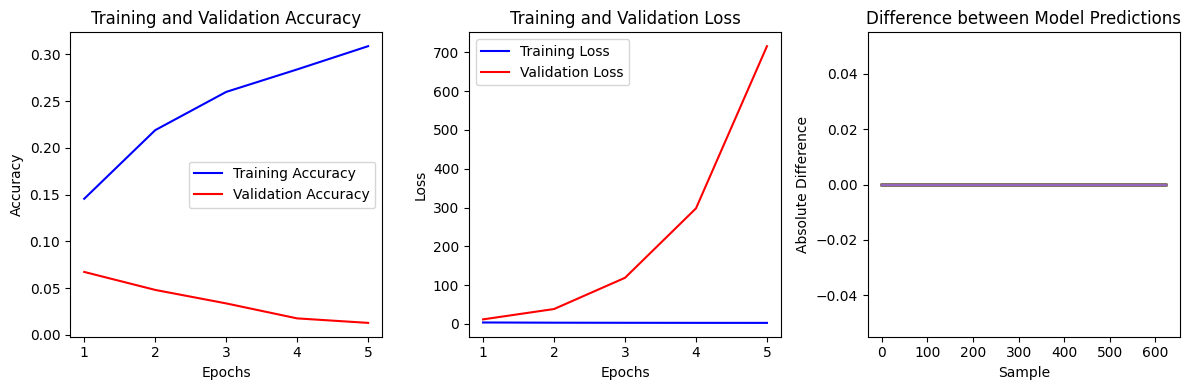

In [96]:
# Assuming 'hist' is the history object returned by model2.fit
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 3, 1)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 3, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Difference between model predictions
diff = np.abs(y_pred1 - y_pred2)
plt.subplot(1, 3, 3)
plt.plot(diff)
plt.title('Difference between Model Predictions')
plt.xlabel('Sample')
plt.ylabel('Absolute Difference')


plt.tight_layout()
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 270ms/step


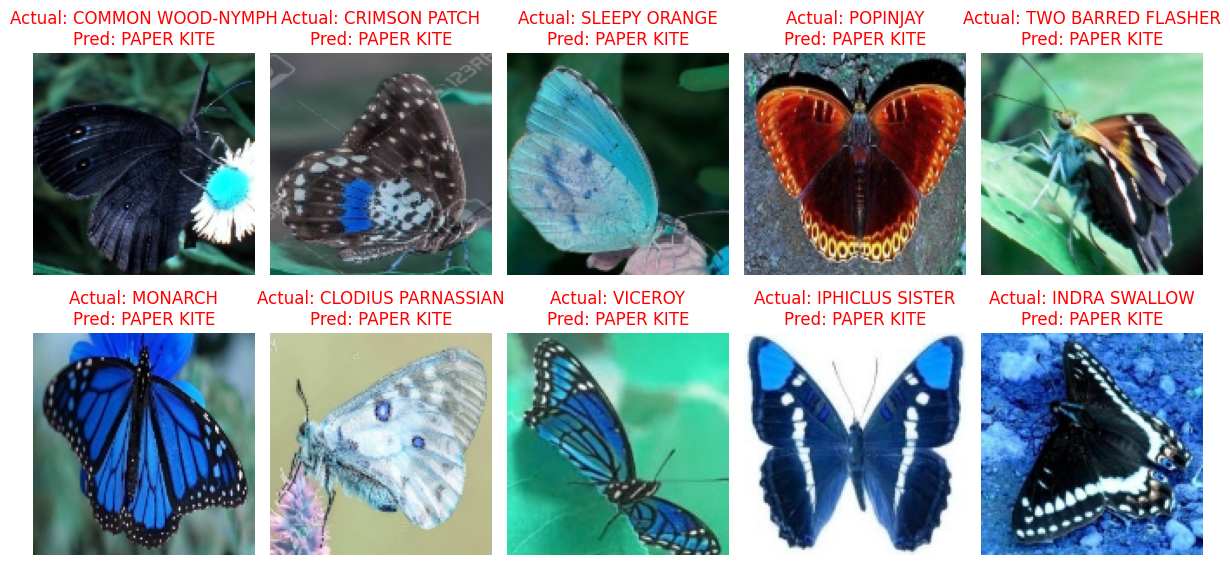

In [107]:
y_pred1 = model.predict(x_test)
y_pred_classes = np.argmax(y_pred1, axis=1)
y_true = np.argmax(y_test, axis=1)
class_labels = label_encoder.classes_
num_images = 10
plt.figure(figsize=(12, 6))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Actual: {class_labels[y_true[i]]}\nPred: {class_labels[y_pred_classes[i]]}",
              color="green" if y_true[i] == y_pred_classes[i] else "red")
    plt.axis("off")
plt.tight_layout()
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 273ms/step


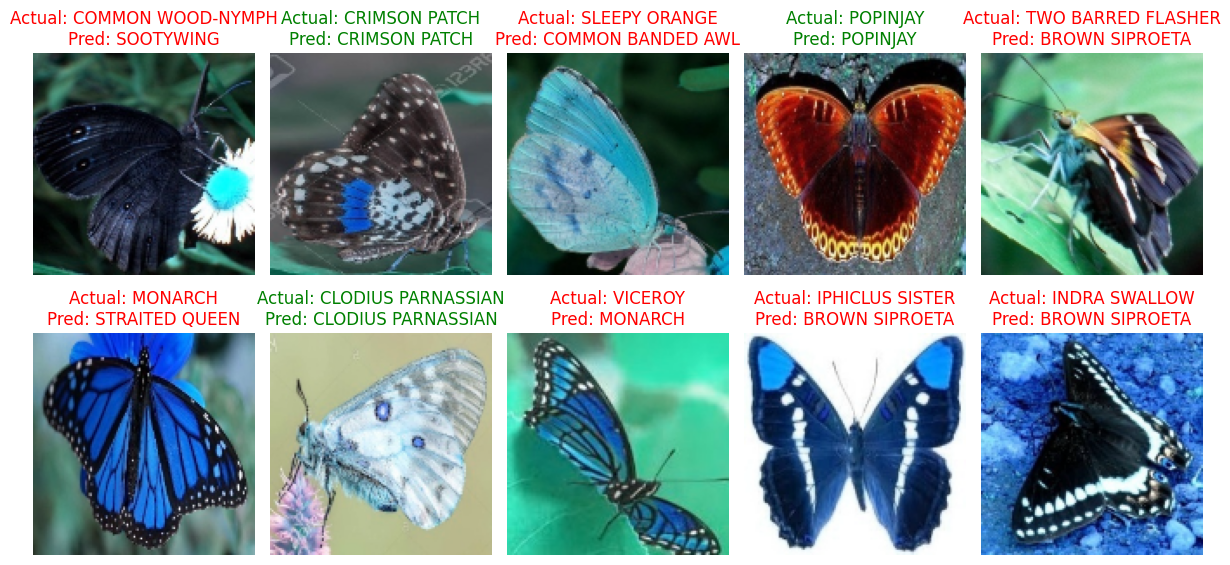

In [113]:
y_pred2 = model.predict(x_test)
y_pred_classes = np.argmax(y_pred2, axis=1)
y_true = np.argmax(y_test, axis=1)
class_labels = label_encoder.classes_
plt.figure(figsize=(12, 6))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Actual: {class_labels[y_true[i]]}\nPred: {class_labels[y_pred_classes[i]]}",
              color="green" if y_true[i] == y_pred_classes[i] else "red")
    plt.axis("off")
plt.tight_layout()
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 272ms/step


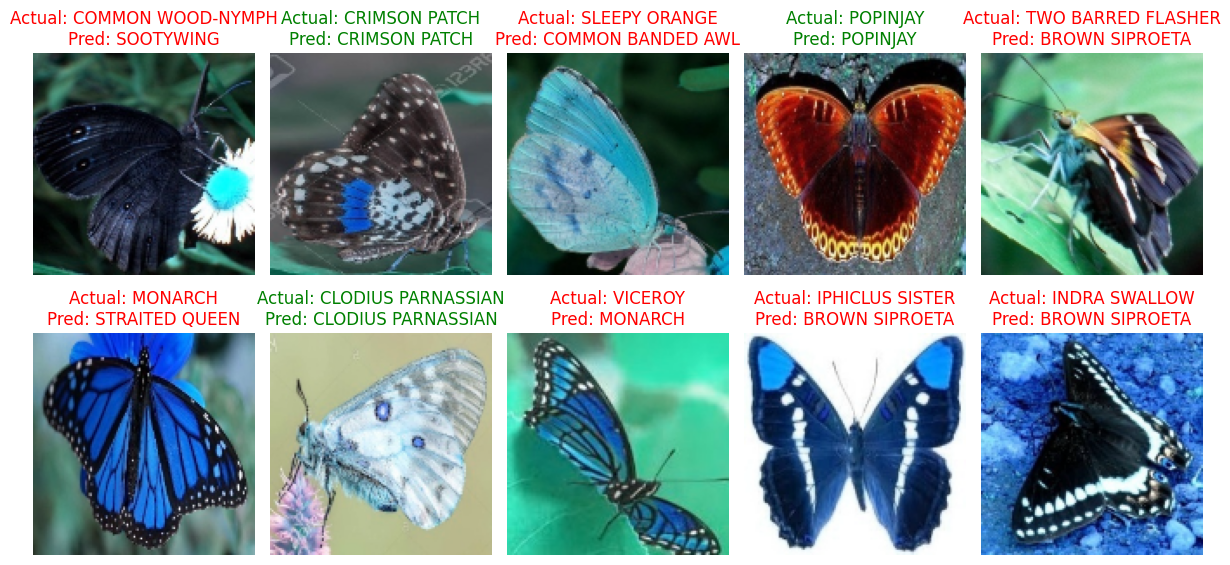

In [112]:
y_pred3 = model.predict(x_test)
y_pred_classes = np.argmax(y_pred3, axis=1)
y_true = np.argmax(y_test, axis=1)
class_labels = label_encoder.classes_
plt.figure(figsize=(12, 6))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Actual: {class_labels[y_true[i]]}\nPred: {class_labels[y_pred_classes[i]]}",
              color="green" if y_true[i] == y_pred_classes[i] else "red")
    plt.axis("off")
plt.tight_layout()
plt.show()
